In [2]:
import torch
import sys
sys.path.append("../")
from models import Patching, LinearProjection
import os
import cv2
from einops import rearrange
import matplotlib.pyplot as plt
from pathlib import Path
from einops.layers.torch import Rearrange

In [3]:
image_path = "../../datasets/COVID/images/0.jpg"
Path(image_path).exists()

True

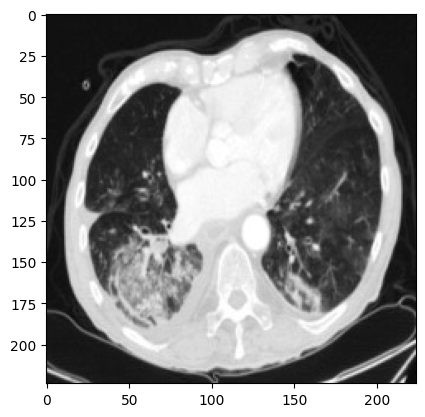

In [4]:
img_array = cv2.resize(cv2.imread(image_path, 0), (224,224))

plt.imshow(img_array, cmap="gray")

In [5]:
img_tensor = torch.Tensor(img_array).unsqueeze(0).unsqueeze(0)
print(img_tensor.shape)

torch.Size([1, 1, 224, 224])


In [6]:
Patch = Patching(patch_size=32)
pt_img_tensor = Patch(img_tensor)
pt_img_tensor.shape

torch.Size([1, 49, 1024])

In [9]:
LProj = LinearProjection(patch_dim=1024, dim=1000)
LProj(pt_img_tensor).shape

torch.Size([1, 49, 1000])